
Introduction:

1] Diabetes mellitus, a widespread metabolic disorder characterized by elevated blood sugar levels, poses a significant global health challenge.
2] Timely detection and effective management are essential to mitigate complications and enhance patient well-being. Leveraging advanced machine learning techniques, this study aims to develop precise predictive models for diabetes prediction.
3] By analyzing diverse datasets encompassing demographic details, medical history, and clinical measurements, various machine learning algorithms are employed to identify predictive patterns.
4] Through meticulous data preprocessing, feature selection, and model evaluation, robust predictive models are crafted to differentiate between individuals with and without diabetes.
5] By exploring algorithms like logistic regression, decision trees, random forests, support vector machines, and neural networks, this research offers comprehensive insights into predictive modeling techniques.

Importing Libraries: Import the necessary Python libraries, including pandas for data manipulation and analysis.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import sklearn



Loading the Dataset: Load the dataset into a pandas DataFrame using the read_csv() function. Replace '/content/diabetes_prediction_dataset.csv' with the actual file path where the dataset is located.
Displaying the First Few Rows: Use the head() method to display the first few rows of the dataset, providing an initial glimpse of its structure and contents.

This sequence of actions loads the diabetes dataset into a DataFrame and displays the first few rows, allowing for initial exploration and understanding of the dataset's structure and contents.

In [ ]:
diabetes = pd.read_csv('/content/diabetes_prediction_dataset.csv')
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Feature Information: Display the column names and data types to understand the variables in the dataset.

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Summary Statistics: Generate descriptive statistics for numerical features to understand their distribution and variability.

In [ ]:
diab_num = diabetes[['age','bmi','HbA1c_level','blood_glucose_level']]
diab_num.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [ ]:
diabetes = diabetes[diabetes.gender != 'Other']

In [ ]:
diabetes.gender.value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

In [ ]:
diabetes.shape

(99982, 9)

Identify Missing Values: Use the isnull() method to identify missing values in the dataset. This method returns a DataFrame of the same shape as the original dataset, where each cell contains a boolean value indicating whether it is missing (True) or not (False).
Summarize Missing Values: After identifying missing values, use the sum() method to calculate the total number of missing values for each feature. This provides an overview of the extent of missingness across different variables.

In [ ]:

diabetes.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
d_eda = diabetes.copy()

**Data Analysis**



*   The pie chart illustrates that 91.5% of individuals in the dataset do not have diabetes, while 8.5% have been diagnosed with diabetes. This class imbalance highlights the need to address predictive model bias towards the majority class (no diabetes) to ensure accurate detection of individuals with diabetes.
*   Effective strategies for mitigating class imbalance include resampling techniques and using appropriate evaluation metrics. Ultimately, accurately predicting diabetes cases is crucial for facilitating early intervention and personalized healthcare strategies, leading to improved patient outcomes.



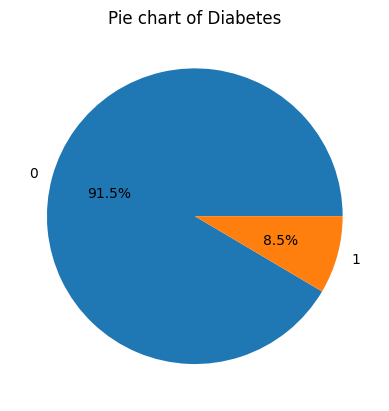

In [ ]:
plt.pie(d_eda['diabetes'].value_counts(),labels=d_eda['diabetes'].value_counts().index,autopct='%1.1f%%')
plt.title('Pie chart of Diabetes')
plt.show()



*   Age vs. Diabetes: Shows diabetes cases across ages. X-axis: age, Y-axis: diabetes status (0 = no diabetes, 1 = diabetes). Observes how diabetes prevalence changes with age.
*   BMI vs. Diabetes: Depicts BMI's relation to diabetes. X-axis: BMI, Y-axis: diabetes status. Reveals how diabetes incidence correlates with BMI levels.
*  HbA1c Level vs. Diabetes: Illustrates HbA1c levels' association with diabetes. X-axis: HbA1c levels, Y-axis: diabetes status. Demonstrates changes in diabetes prevalence concerning HbA1c levels.
*   Blood Glucose Level vs. Diabetes: Depicts blood glucose levels' relation to diabetes. X-axis: blood glucose levels, Y-axis: diabetes status. Identifies trends in diabetes occurrence concerning blood glucose levels.





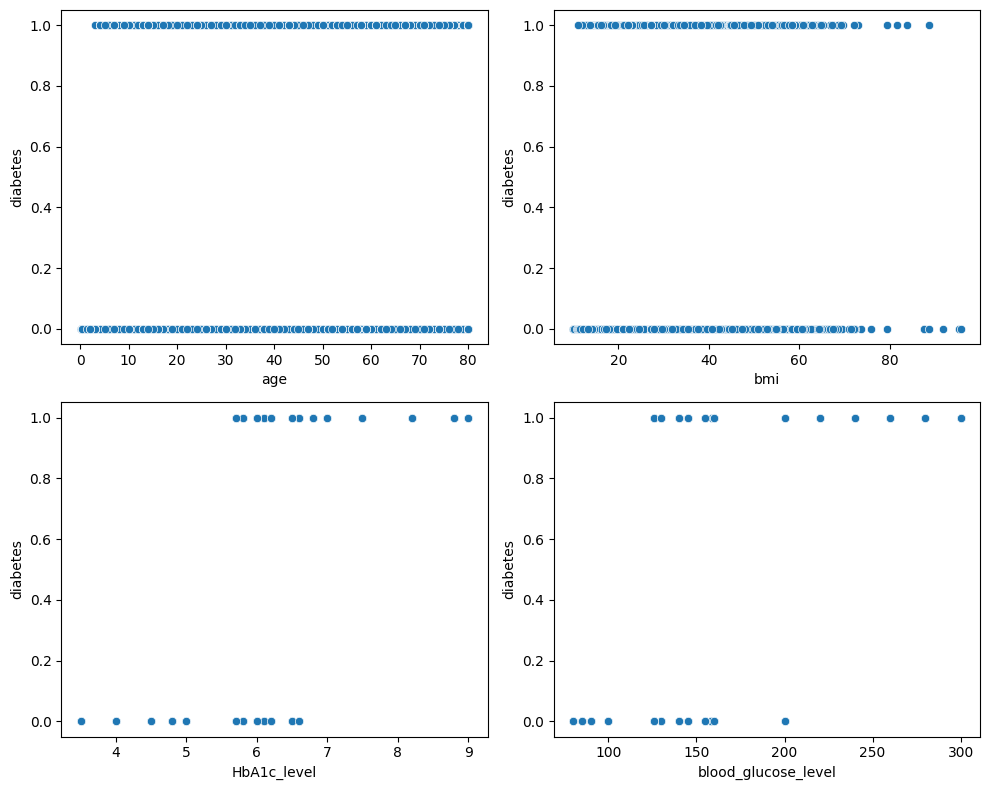

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=d_eda,x='age',y='diabetes',ax=axes[0,0])
sns.scatterplot(data=d_eda,x='bmi',y='diabetes',ax=axes[0,1])
sns.scatterplot(data=d_eda,x='HbA1c_level',y='diabetes',ax=axes[1,0])
sns.scatterplot(data=d_eda,x='blood_glucose_level',y='diabetes',ax=axes[1,1])
plt.tight_layout()
plt.show()



*   Age vs. Diabetes: Shows diabetes cases across ages, with hypertension status represented by color. Observes how diabetes prevalence changes with age, considering hypertension.
*   BMI vs. Diabetes: Depicts BMI's relation to diabetes, considering hypertension. Reveals how diabetes incidence correlates with BMI levels, considering hypertension.
*   HbA1c Level vs. Diabetes: Illustrates HbA1c levels' association with diabetes, considering hypertension. Demonstrates changes in diabetes prevalence concerning HbA1c levels, considering hypertension.
*   Blood Glucose Level vs. Diabetes: Depicts blood glucose levels' relation to diabetes, considering hypertension. Identifies trends in diabetes occurrence concerning blood glucose levels, considering hypertension status.





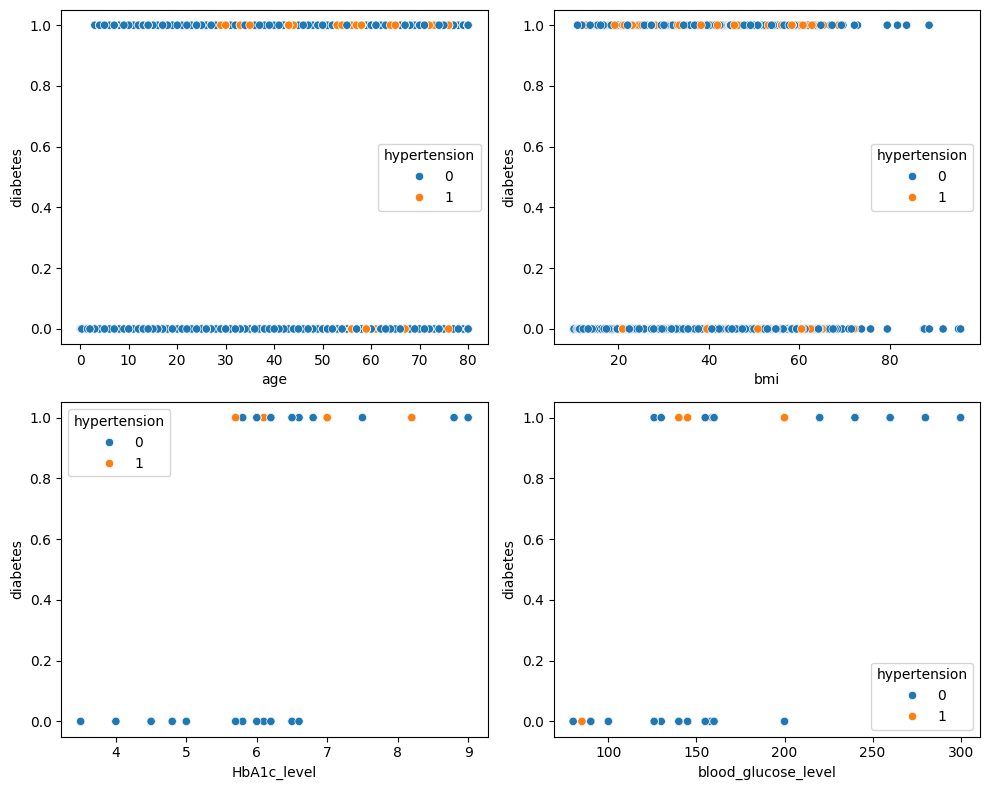

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=d_eda,x='age',y='diabetes',hue=d_eda['hypertension'],ax=axes[0,0])
sns.scatterplot(data=d_eda,x='bmi',y='diabetes',hue=d_eda['hypertension'],ax=axes[0,1])
sns.scatterplot(data=d_eda,x='HbA1c_level',y='diabetes',hue=d_eda['hypertension'],ax=axes[1,0])
sns.scatterplot(data=d_eda,x='blood_glucose_level',y='diabetes',hue=d_eda['hypertension'],ax=axes[1,1])
plt.tight_layout()
plt.show()



*   Age vs. Diabetes: Shows diabetes cases across ages, with heart disease status represented by color. Observes how diabetes prevalence changes with age, considering heart disease.
*   BMI vs. Diabetes: Depicts BMI's relation to diabetes, considering heart disease. Reveals how diabetes incidence correlates with BMI levels, considering heart disease.
*   HbA1c Level vs. Diabetes: Illustrates HbA1c levels' association with diabetes, considering heart disease. Demonstrates changes in diabetes prevalence concerning HbA1c levels, considering heart disease.
*   Blood Glucose Level vs. Diabetes: Depicts blood glucose levels' relation to diabetes, considering heart disease. Identifies trends in diabetes occurrence concerning blood glucose levels, considering heart disease status.





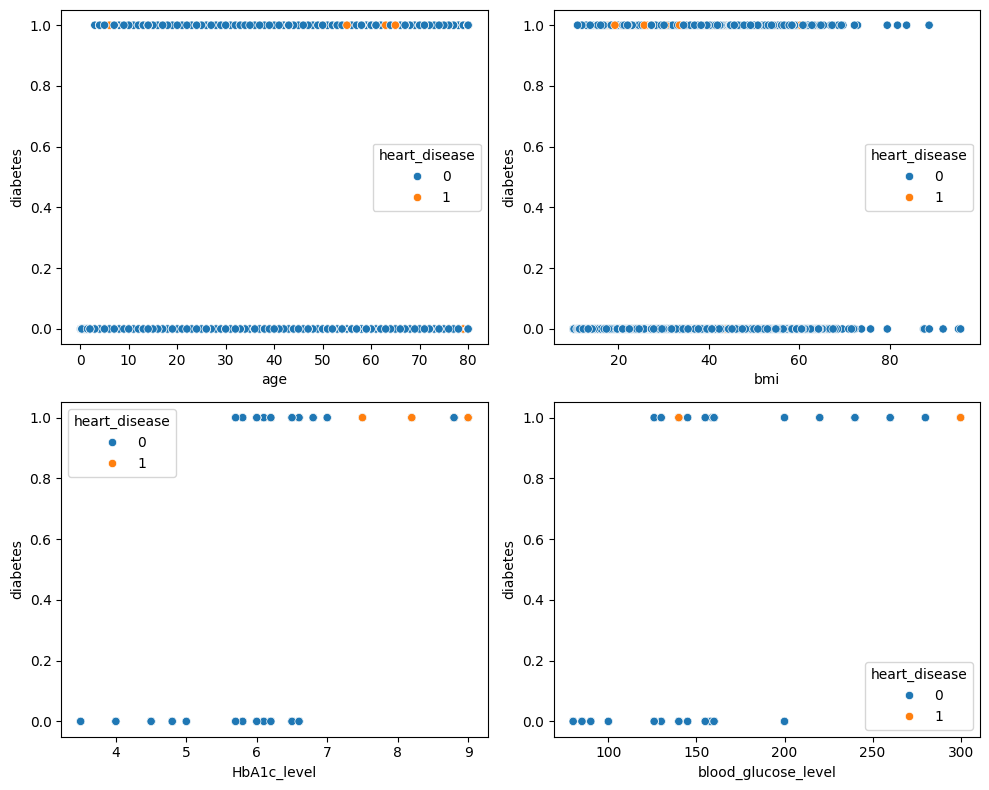

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=d_eda,x='age',y='diabetes',hue=d_eda['heart_disease'],ax=axes[0,0])
sns.scatterplot(data=d_eda,x='bmi',y='diabetes',hue=d_eda['heart_disease'],ax=axes[0,1])
sns.scatterplot(data=d_eda,x='HbA1c_level',y='diabetes',hue=d_eda['heart_disease'],ax=axes[1,0])
sns.scatterplot(data=d_eda,x='blood_glucose_level',y='diabetes',hue=d_eda['heart_disease'],ax=axes[1,1])
plt.tight_layout()
plt.show()


*   Age vs. Diabetes: Shows diabetes cases across ages, with gender represented by color. Observes how diabetes prevalence changes with age, considering gender.
*   BMI vs. Diabetes: Depicts BMI's relation to diabetes, considering gender. Reveals how diabetes incidence correlates with BMI levels, considering gender.
*   HbA1c Level vs. Diabetes: Illustrates HbA1c levels' association with diabetes, considering gender. Demonstrates changes in diabetes prevalence concerning HbA1c levels, considering gender.
*   Blood Glucose Level vs. Diabetes: Depicts blood glucose levels' relation to diabetes, considering gender. Identifies trends in diabetes occurrence concerning blood glucose levels, considering gender.



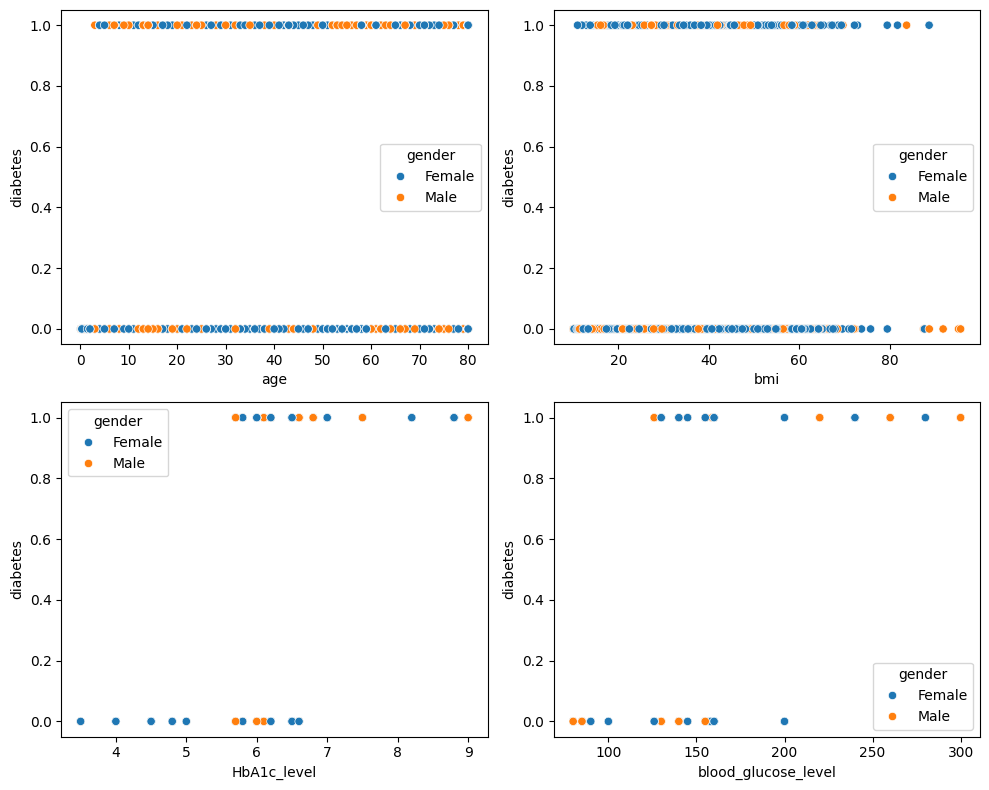

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=d_eda,x='age',y='diabetes',hue=d_eda['gender'],ax=axes[0,0])
sns.scatterplot(data=d_eda,x='bmi',y='diabetes',hue=d_eda['gender'],ax=axes[0,1])
sns.scatterplot(data=d_eda,x='HbA1c_level',y='diabetes',hue=d_eda['gender'],ax=axes[1,0])
sns.scatterplot(data=d_eda,x='blood_glucose_level',y='diabetes',hue=d_eda['gender'],ax=axes[1,1])
plt.tight_layout()
plt.show()

This correlation matrix visually represents the correlations between different numerical variables in the dataset after dropping the 'gender' and 'smoking_history' columns. Here's how to interpret it:

*   The matrix consists of a grid where each cell represents the correlation coefficient between two variables.
Values closer to 1 indicate a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. Values closer to -1 indicate a strong negative correlation, meaning that as one variable increases, the other tends to decrease. A value of 0 indicates no correlation.
*   The diagonal from top-left to bottom-right represents the correlation of each variable with itself, which is always 1.
The annotations within each cell show the correlation coefficient between the corresponding pair of variables.
This heatmap helps visualize which variables are strongly correlated with each other and which ones are not, providing insights into potential relationships between different features in the dataset.



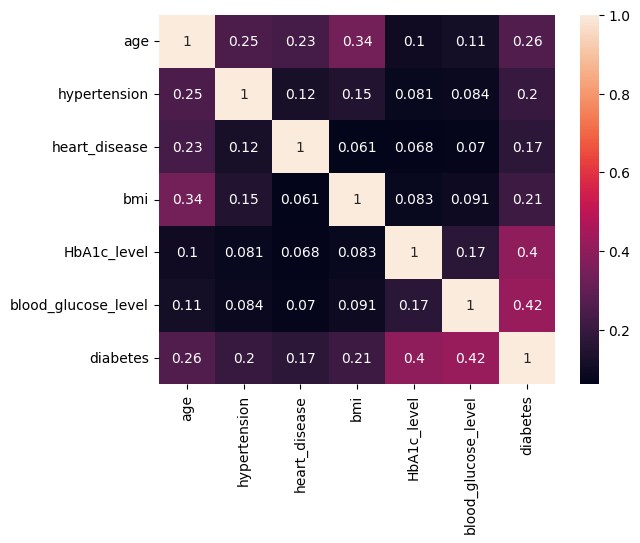

In [ ]:
b_num = d_eda.drop(['gender','smoking_history'],axis=1)
corr_diab = b_num.corr()
sns.heatmap(corr_diab,annot=True)
plt.show()


In [ ]:
gender_g = d_eda.groupby(['gender','diabetes']).size().unstack()
hyper_g = d_eda.groupby(['hypertension','diabetes']).size().unstack()
heart_g = d_eda.groupby(['heart_disease','diabetes']).size().unstack()
smoke_g = d_eda.groupby(['smoking_history','diabetes']).size().unstack()

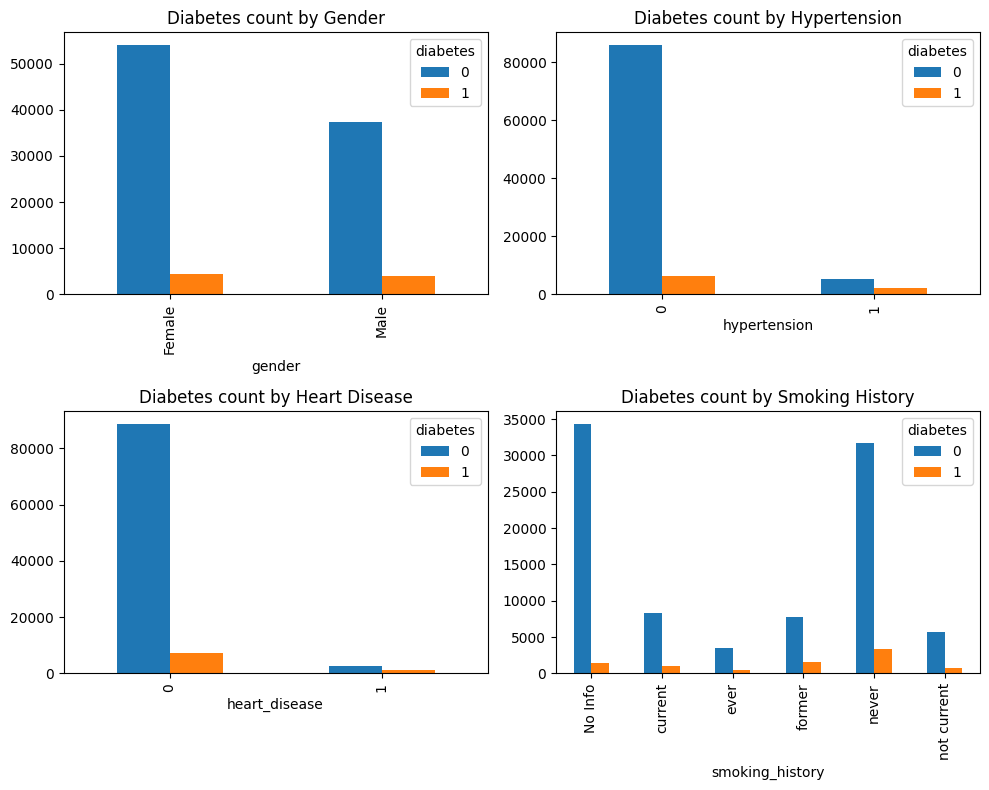

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
gender_g.plot(kind='bar',ax=axes[0,0])
axes[0,0].set_title('Diabetes count by Gender')
hyper_g.plot(kind='bar',ax=axes[0,1])
axes[0,1].set_title('Diabetes count by Hypertension')
heart_g.plot(kind='bar',ax=axes[1,0])
axes[1,0].set_title('Diabetes count by Heart Disease')
smoke_g.plot(kind='bar',ax=axes[1,1])
axes[1,1].set_title('Diabetes count by Smoking History')
plt.tight_layout()
plt.show()

**Insights:**
1] Almost 92% of people do not have Hypertension.
2] Similar values are seen for number of people having heart disease.
3] Number of people having never smoked and those having no information are the largest.
4] The target class is not balanced.
5] No strong correlations were observed between variables.






**Train Test Split and Data Preprocessing**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
diab_train, diab_test = train_test_split(diabetes, test_size=0.2, stratify=diabetes['diabetes'])


In [ ]:
diab_train_features = diab_train.drop('diabetes', axis=1)
diab_train_labels = diab_train['diabetes']

diab_test_features = diab_test.drop('diabetes', axis=1)
diab_test_labels = diab_test['diabetes']


In [ ]:
num_attribs = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
cat_attribs = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_attribs),
    ('cat', cat_transformer, cat_attribs)
])

preprocessed_train_data = preprocessor.fit_transform(diab_train_features)
preprocessed_test_data = preprocessor.transform(diab_test_features)


This code performs feature selection using Mutual Information for a classification task. Here's a breakdown of what it does:

Feature Selection: It selects the top k features based on their mutual information with the target variable (diab_train_labels) using the SelectKBest method from scikit-learn's feature_selection module. In this case, k=5 features are selected.

Indices of Selected Features: It retrieves the indices of the selected features using the get_support method.

Filtering Selected Indices: It ensures that the selected indices are within the bounds of the number of columns in the diab_train_features DataFrame.

Selected Feature Names: It retrieves the names of the selected features from the column names of the diab_train_features DataFrame.

Creating a New DataFrame: It creates new DataFrames (selected_features_train and selected_features_test) containing only the selected features for both the training and test datasets.

Printing Selected Features: It prints the names of the selected features.

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Assuming preprocessed_train_data, diab_train_labels, and diab_train_features are already defined

# Feature selection using Mutual Information
best_features = SelectKBest(score_func=mutual_info_classif, k=5)
fit = best_features.fit(preprocessed_train_data, diab_train_labels)

# Get the indices of the selected features
selected_indices = fit.get_support(indices=True)



# Filter selected indices to ensure they are within bounds
selected_indices = [idx for idx in selected_indices if idx < len(diab_train_features.columns)]

# Get the selected feature names
selected_feature_names = diab_train_features.columns[selected_indices].tolist()

# Create a new DataFrame with the selected features
selected_features_train = pd.DataFrame(preprocessed_train_data[:, selected_indices], columns=selected_feature_names)
selected_features_test = pd.DataFrame(preprocessed_test_data[:, selected_indices], columns=selected_feature_names)

# Print selected features
print("Selected Features:")
print(selected_feature_names)


Selected Features:
['gender', 'hypertension', 'heart_disease', 'HbA1c_level']


**Model Selection and Prediction**

**Decision Tree**

Import Libraries: It imports necessary libraries, including DecisionTreeClassifier from scikit-learn and accuracy_score from sklearn.metrics.

Define the Classifier: It defines a Decision Tree Classifier (clf) without specifying any hyperparameters, so it uses default settings.

Train the Classifier: It trains the Decision Tree Classifier using the selected features (selected_features_train) and corresponding labels (diab_train_labels).

Make Predictions: It uses the trained classifier to make predictions on the test dataset (selected_features_test).

Evaluate the Model: It evaluates the model's performance by comparing the predicted labels with the true labels from the test dataset and calculates the accuracy using the accuracy_score function.

Print Accuracy: It prints the accuracy of the model on the test dataset.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming selected_features_train and selected_features_test are already defined

# Train a Decision Tree Classifier on the selected features
clf = DecisionTreeClassifier()
clf.fit(selected_features_train, diab_train_labels)

# Predictions on test data
predictions = clf.predict(selected_features_test)

# Evaluate the model
accuracy = accuracy_score(diab_test_labels, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9673451017652648


Import Libraries: It imports necessary libraries, including DecisionTreeClassifier from scikit-learn and accuracy_score from sklearn.metrics.

Define the Classifier: It defines a Decision Tree Classifier (clf) without specifying any hyperparameters, so it uses default settings.

Train the Classifier: It trains the Decision Tree Classifier using the selected features (selected_features_train) and corresponding labels (diab_train_labels).

Make Predictions: It uses the trained classifier to make predictions on the test dataset (selected_features_test).

Evaluate the Model: It evaluates the model's performance by comparing the predicted labels with the true labels from the test dataset and calculates the accuracy using the accuracy_score function.

Print Accuracy: It prints the accuracy of the model on the test dataset.



Training Accuracy (Very Reduced): 0.9719697443270613
Testing Accuracy (Very Reduced): 0.9714457168575287


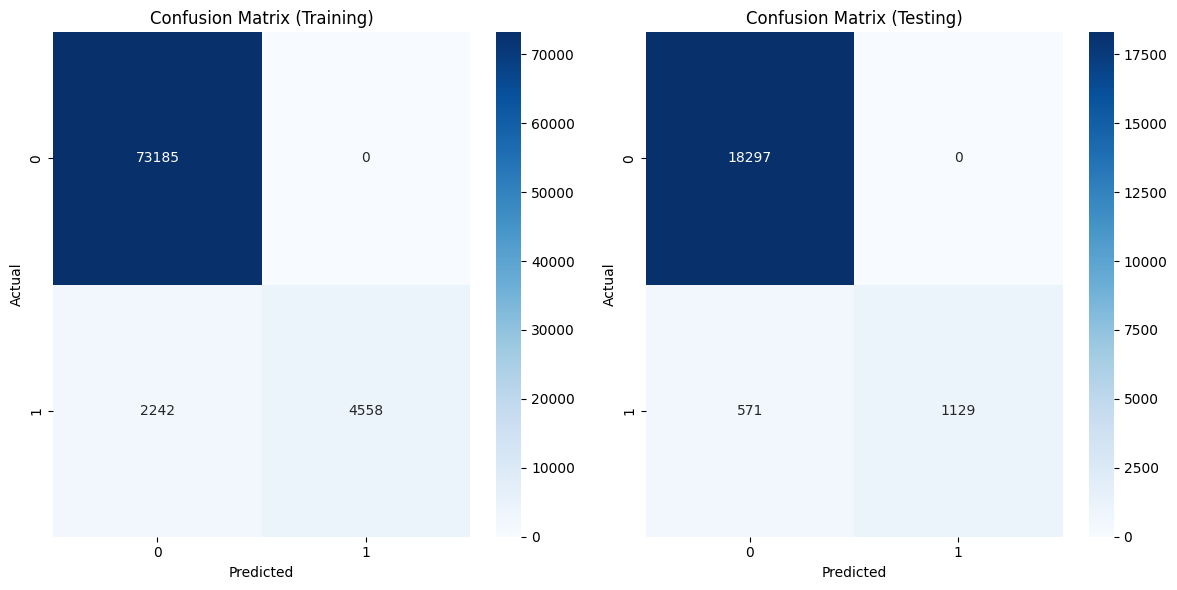

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the DecisionTreeClassifier with even further reduced complexity
tree_clf_very_reduced = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the classifier to the training data
tree_clf_very_reduced.fit(preprocessed_train_data, diab_train_labels)

# Get the predictions
y_pred_train_very_reduced = tree_clf_very_reduced.predict(preprocessed_train_data)
y_pred_test_very_reduced = tree_clf_very_reduced.predict(preprocessed_test_data)

# Calculate accuracy
acc_train_very_reduced = accuracy_score(diab_train_labels, y_pred_train_very_reduced)
acc_test_very_reduced = accuracy_score(diab_test_labels, y_pred_test_very_reduced)
print('Training Accuracy (Very Reduced):', acc_train_very_reduced)
print('Testing Accuracy (Very Reduced):', acc_test_very_reduced)

# Calculate confusion matrices
cm_train = confusion_matrix(diab_train_labels, y_pred_train_very_reduced)
cm_test = confusion_matrix(diab_test_labels, y_pred_test_very_reduced)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


Import Libraries: It imports the log_loss function from sklearn.metrics.

Predict Probabilities: It predicts the probabilities of the classes for both the training and testing sets using the predict_proba method of the trained Decision Tree Classifier (tree_clf_very_reduced).

Compute Cross-Entropy Loss: It calculates the cross-entropy loss for both the training and testing sets using the log_loss function. Cross-entropy loss measures the difference between the predicted probabilities and the actual labels.

Print Results: It prints the computed cross-entropy loss values for both the training and testing sets.

In [ ]:
from sklearn.metrics import log_loss

# Predict probabilities for training and testing sets
y_prob_train = tree_clf_very_reduced.predict_proba(preprocessed_train_data)
y_prob_test = tree_clf_very_reduced.predict_proba(preprocessed_test_data)

# Compute cross-entropy loss for training and testing sets
cross_entropy_train = log_loss(diab_train_labels, y_prob_train)
cross_entropy_test = log_loss(diab_test_labels, y_prob_test)

print('Cross-Entropy Loss (Training):', cross_entropy_train)
print('Cross-Entropy Loss (Testing):', cross_entropy_test)


Cross-Entropy Loss (Training): 0.126158166678377
Cross-Entropy Loss (Testing): 0.12800063708604295


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Instantiate the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(preprocessed_train_data, diab_train_labels)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Evaluate training accuracy
y_pred_train = best_model.predict(preprocessed_train_data)
acc_train = accuracy_score(diab_train_labels, y_pred_train)
print('Training Accuracy of DecisionTreeClassifier with GridSearchCV:', acc_train)

# Evaluate testing accuracy
y_pred_test = best_model.predict(preprocessed_test_data)
acc_test = accuracy_score(diab_test_labels, y_pred_test)
print('Testing Accuracy of DecisionTreeClassifier with GridSearchCV:', acc_test)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy of DecisionTreeClassifier with GridSearchCV: 0.971657185722323
Testing Accuracy of DecisionTreeClassifier with GridSearchCV: 0.9726959043856579


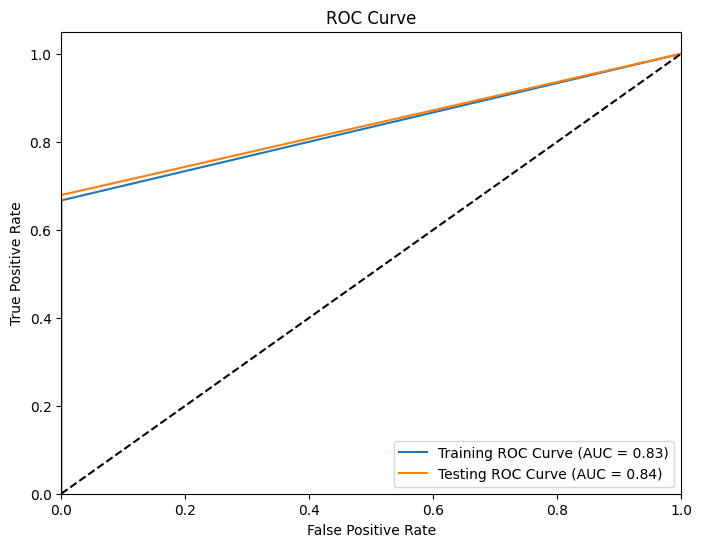

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities for class 1 (positive class)
y_probs_train_very_reduced = tree_clf_very_reduced.predict_proba(preprocessed_train_data)[:, 1]
y_probs_test_very_reduced = tree_clf_very_reduced.predict_proba(preprocessed_test_data)[:, 1]

# Calculate the ROC curve
fpr_train, tpr_train, _ = roc_curve(diab_train_labels, y_probs_train_very_reduced)
fpr_test, tpr_test, _ = roc_curve(diab_test_labels, y_probs_test_very_reduced)

# Calculate the Area Under the ROC Curve (AUC)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming selected_features_train and selected_features_test are already defined

# Train a Random Forest Classifier on the selected features
clf = RandomForestClassifier()
clf.fit(selected_features_train, diab_train_labels)

# Predictions on test data
predictions = clf.predict(selected_features_test)

# Evaluate the model
accuracy = accuracy_score(diab_test_labels, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.966244936740511


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

forest_clf.fit(preprocessed_train_data, diab_train_labels)

y_pred_train = forest_clf.predict(preprocessed_train_data)
acc_train = accuracy_score(diab_train_labels, y_pred_train)
print('Training Accuracy:', acc_train)

y_pred_test = forest_clf.predict(preprocessed_test_data)
acc_test = accuracy_score(diab_test_labels, y_pred_test)
print('Testing Accuracy:', acc_test)


Training Accuracy: 0.9720447583921985
Testing Accuracy: 0.9711456718507776


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared for training and testing sets
r_squared_train = r2_score(diab_train_labels, y_pred_train)
r_squared_test = r2_score(diab_test_labels, y_pred_test)

# Number of predictors (features)
num_predictors = preprocessed_train_data.shape[1]

# Calculate adjusted R-squared for training and testing sets
adj_r_squared_train = 1 - (1 - r_squared_train) * (len(diab_train_labels) - 1) / (len(diab_train_labels) - num_predictors - 1)
adj_r_squared_test = 1 - (1 - r_squared_test) * (len(diab_test_labels) - 1) / (len(diab_test_labels) - num_predictors - 1)

print('Adjusted R-squared (Training):', adj_r_squared_train)
print('Adjusted R-squared (Testing):', adj_r_squared_test)


Adjusted R-squared (Training): 0.6405518576905381
Adjusted R-squared (Testing): 0.6287559562945049


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Instantiate the RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=forest_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(preprocessed_train_data, diab_train_labels)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Evaluate training accuracy
y_pred_train = best_model.predict(preprocessed_train_data)
acc_train = accuracy_score(diab_train_labels, y_pred_train)
print('Training Accuracy of RandomForestClassifier with GridSearchCV:', acc_train)

# Evaluate testing accuracy
y_pred_test = best_model.predict(preprocessed_test_data)
acc_test = accuracy_score(diab_test_labels, y_pred_test)
print('Testing Accuracy of RandomForestClassifier with GridSearchCV:', acc_test)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Training Accuracy of RandomForestClassifier with GridSearchCV: 0.9721625
Testing Accuracy of RandomForestClassifier with GridSearchCV: 0.9707


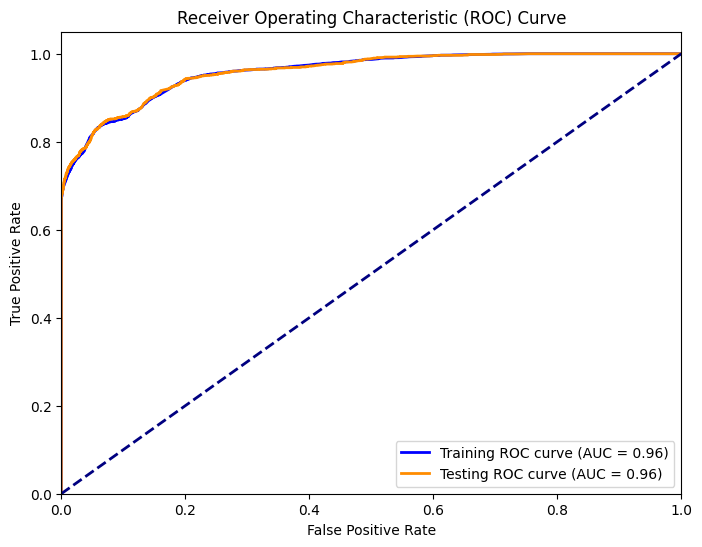

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class
y_probs_train = forest_clf.predict_proba(preprocessed_train_data)[:, 1]
y_probs_test = forest_clf.predict_proba(preprocessed_test_data)[:, 1]

# Calculate ROC curve for training set
fpr_train, tpr_train, _ = roc_curve(diab_train_labels, y_probs_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve for testing set
fpr_test, tpr_test, _ = roc_curve(diab_test_labels, y_probs_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Testing ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix

**Support Vector Machine**

Training Accuracy of SVM Classifier: 0.9614052634869038
Testing Accuracy of SVM Classifier: 0.9593439015852377


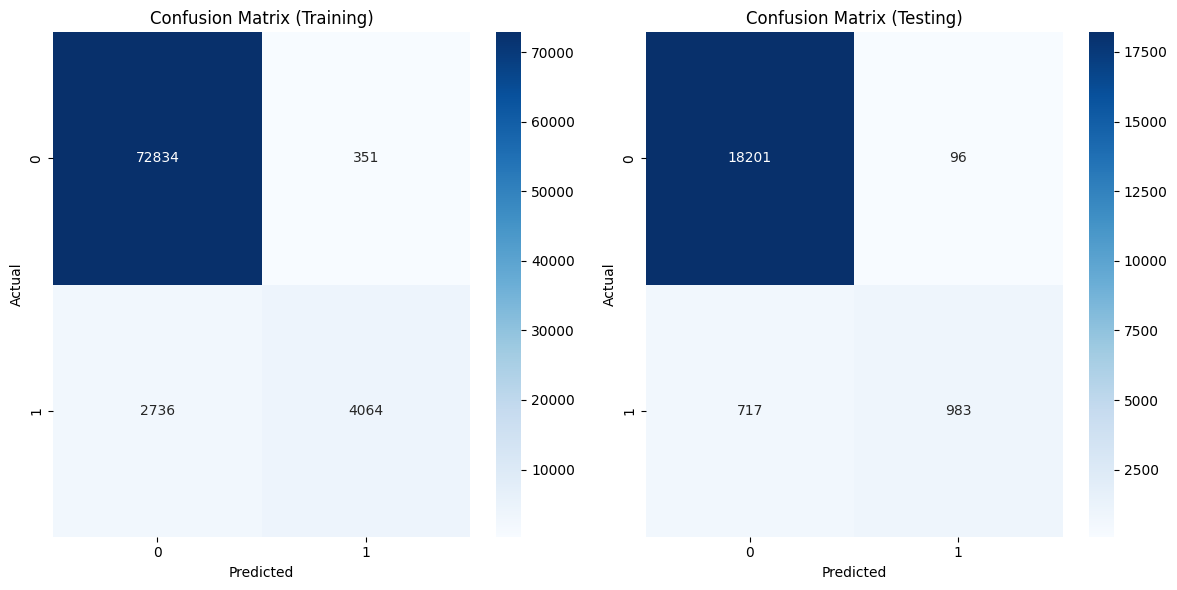

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate SVM Classifier
svm_clf = SVC(kernel='linear', random_state=82)

# Fit the classifier to the training data
svm_clf.fit(preprocessed_train_data, diab_train_labels)

# Predictions on training data
y_pred_train_svm = svm_clf.predict(preprocessed_train_data)
# Predictions on test data
y_pred_test_svm = svm_clf.predict(preprocessed_test_data)

# Calculate training accuracy
acc_train_svm = accuracy_score(diab_train_labels, y_pred_train_svm)
print('Training Accuracy of SVM Classifier:', acc_train_svm)

# Calculate testing accuracy
acc_test_svm = accuracy_score(diab_test_labels, y_pred_test_svm)
print('Testing Accuracy of SVM Classifier:', acc_test_svm)

# Calculate confusion matrices
cm_train_svm = confusion_matrix(diab_train_labels, y_pred_train_svm)
cm_test_svm = confusion_matrix(diab_test_labels, y_pred_test_svm)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train_svm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test_svm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


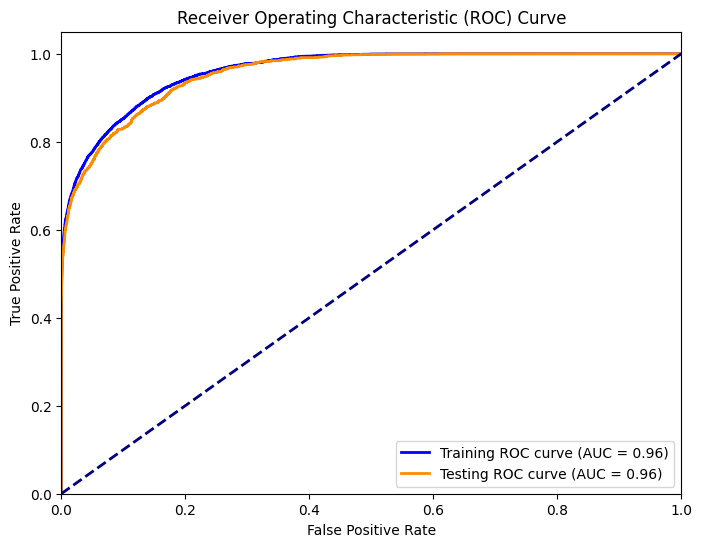

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate decision function scores for training and testing data
train_decision_scores = svm_clf.decision_function(preprocessed_train_data)
test_decision_scores = svm_clf.decision_function(preprocessed_test_data)

# Calculate ROC curve for training set
fpr_train, tpr_train, _ = roc_curve(diab_train_labels, train_decision_scores)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve for testing set
fpr_test, tpr_test, _ = roc_curve(diab_test_labels, test_decision_scores)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Testing ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(preprocessed_train_data, diab_train_labels)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_train_svm = best_model.predict(preprocessed_train_data)
acc_train_svm = accuracy_score(diab_train_labels, y_pred_train_svm)
print('Training Accuracy of SVM Classifier with GridSearchCV:', acc_train_svm)

y_pred_test_svm = best_model.predict(preprocessed_test_data)
acc_test_svm = accuracy_score(diab_test_labels, y_pred_test_svm)
print('Testing Accuracy of SVM Classifier with GridSearchCV:', acc_test_svm)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Training Accuracy of SVM Classifier with GridSearchCV: 0.9695067825217228
Testing Accuracy of SVM Classifier with GridSearchCV: 0.9694454168125218


**K-Nearest Neighbor**

Define KNN Classifier: It defines a KNN classifier (knn_clf) with specified parameters. In this case, the number of neighbors is set to 5, and uniform weights are used.

Train the Classifier: It trains the KNN classifier using the preprocessed training data (preprocessed_train_data) and corresponding labels (diab_train_labels).

Make Predictions: It makes predictions on both the training and test sets using the trained KNN classifier.

Calculate Accuracy: It calculates the accuracy of the KNN classifier on both the training and test sets.

Calculate Confusion Matrices: It computes the confusion matrices for both the training and test predictions, which provide insights into the model's performance in terms of true positives, true negatives, false positives, and false negatives.

Plot Confusion Matrices: It visualizes the confusion matrices using seaborn's heatmap, making it easier to interpret the model's performance on both the training and test data.

Training Accuracy of K-Nearest Neighbors Classifier: 0.9689816840657623
Testing Accuracy of K-Nearest Neighbors Classifier: 0.961794269140371


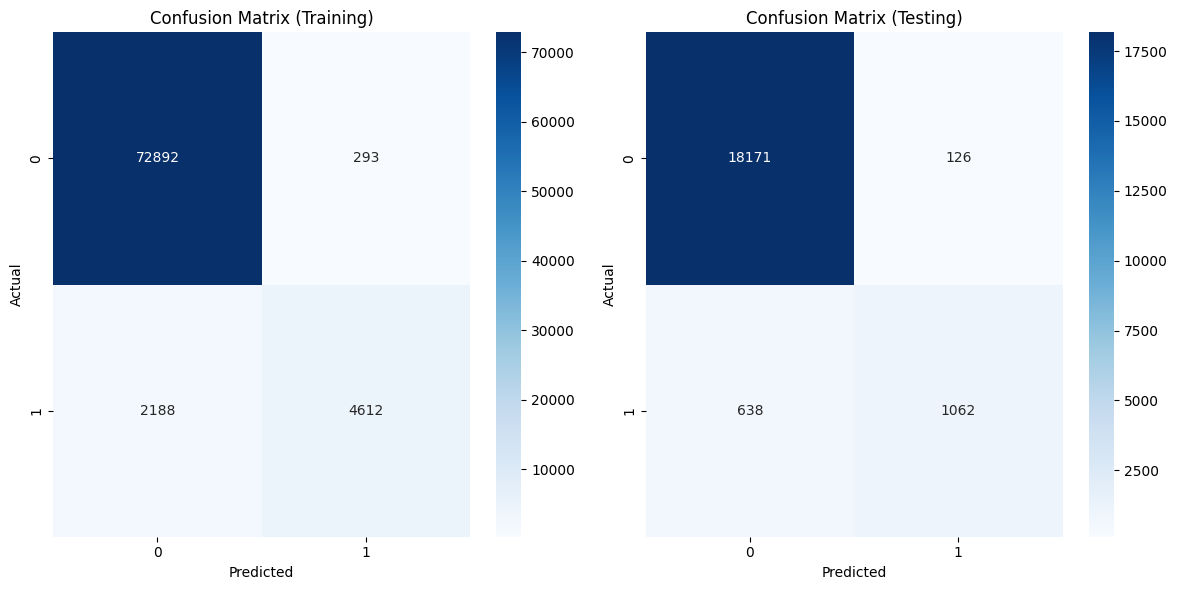

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the KNeighborsClassifier with appropriate parameters
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # For example, 5 neighbors and uniform weights

# Train the classifier
knn_clf.fit(preprocessed_train_data, diab_train_labels)

# Make predictions on the training set
y_pred_train_knn = knn_clf.predict(preprocessed_train_data)

# Calculate training accuracy
acc_train_knn = accuracy_score(diab_train_labels, y_pred_train_knn)
print('Training Accuracy of K-Nearest Neighbors Classifier:', acc_train_knn)

# Make predictions on the test set
y_pred_test_knn = knn_clf.predict(preprocessed_test_data)

# Calculate testing accuracy
acc_test_knn = accuracy_score(diab_test_labels, y_pred_test_knn)
print('Testing Accuracy of K-Nearest Neighbors Classifier:', acc_test_knn)

# Calculate confusion matrices
cm_train_knn = confusion_matrix(diab_train_labels, y_pred_train_knn)
cm_test_knn = confusion_matrix(diab_test_labels, y_pred_test_knn)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train_knn, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test_knn, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


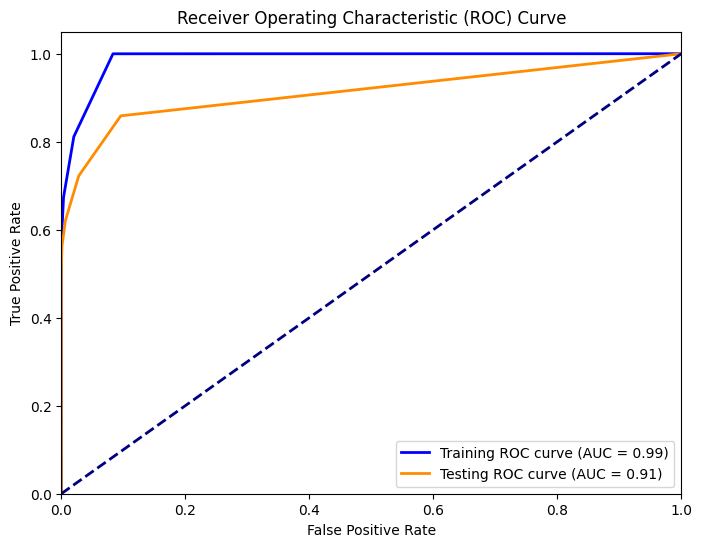

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the decision function scores for the training set
y_scores_train_knn = knn_clf.predict_proba(preprocessed_train_data)[:, 1]

# Get the decision function scores for the test set
y_scores_test_knn = knn_clf.predict_proba(preprocessed_test_data)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_train, tpr_train, _ = roc_curve(diab_train_labels, y_scores_train_knn)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(diab_test_labels, y_scores_test_knn)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Testing ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Hybrid Algorithm(decision tree + random forest)**

Define Individual Classifiers: It defines a Decision Tree classifier (tree_clf) and a Random Forest classifier (forest_clf) with specified hyperparameters.

Define Voting Classifier: It creates a Voting Classifier (voting_clf) that combines the predictions of the individual classifiers using soft voting.

Fit Voting Classifier: It fits the Voting Classifier to the training data (preprocessed_train_data and diab_train_labels).

Make Predictions: It makes predictions on both the training and test sets using the trained Voting Classifier.

Calculate Accuracy: It calculates the accuracy of the Voting Classifier on both the training and test sets.

Calculate Confusion Matrices: It computes the confusion matrices for both the training and test predictions.

Plot Confusion Matrices: It visualizes the confusion matrices using seaborn's heatmap, showing the true positives, true negatives, false positives, and false negatives for both the training and test sets.

Training Accuracy of Voting Classifier (Decision Tree + Random Forest): 0.9722823029317997
Testing Accuracy of Voting Classifier (Decision Tree + Random Forest): 0.9733460019002851


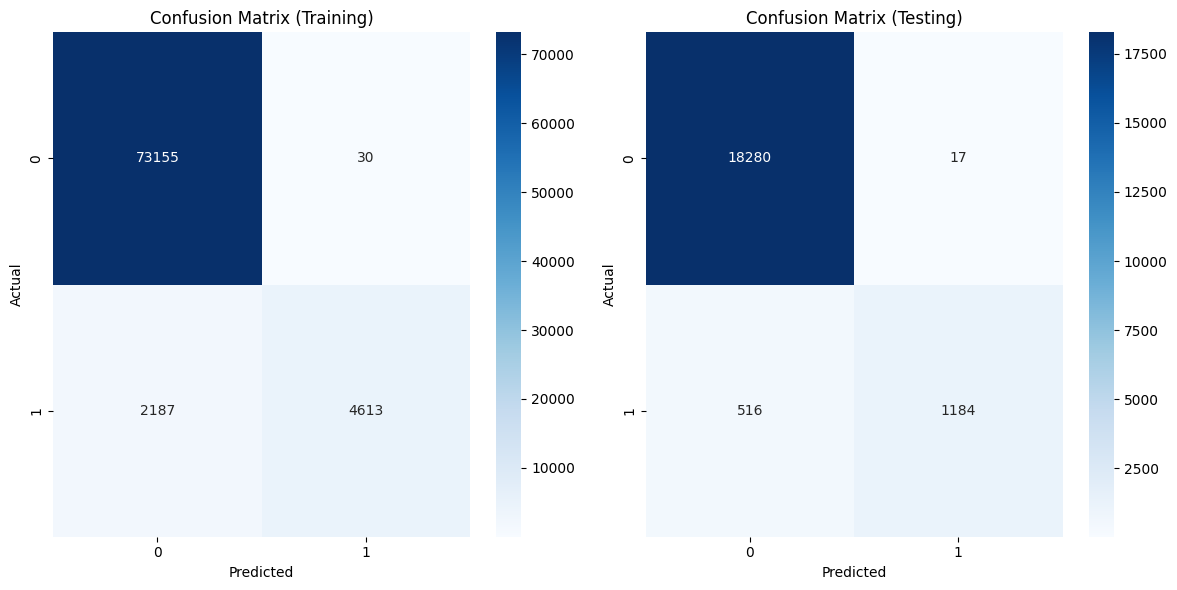

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define individual classifiers
tree_clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=60)
forest_clf = RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42)

# Define the Voting Classifier with soft voting
voting_clf = VotingClassifier(estimators=[('tree', tree_clf), ('forest', forest_clf)], voting='soft')

# Fit the Voting Classifier to the training data
voting_clf.fit(preprocessed_train_data, diab_train_labels)

# Make predictions on the training set
y_pred_train_voting = voting_clf.predict(preprocessed_train_data)
# Calculate training accuracy
acc_train_voting = accuracy_score(diab_train_labels, y_pred_train_voting)
print('Training Accuracy of Voting Classifier (Decision Tree + Random Forest):', acc_train_voting)

# Make predictions on the test set
y_pred_test_voting = voting_clf.predict(preprocessed_test_data)
# Calculate testing accuracy
acc_test_voting = accuracy_score(diab_test_labels, y_pred_test_voting)
print('Testing Accuracy of Voting Classifier (Decision Tree + Random Forest):', acc_test_voting)

# Calculate confusion matrices
cm_train_voting = confusion_matrix(diab_train_labels, y_pred_train_voting)
cm_test_voting = confusion_matrix(diab_test_labels, y_pred_test_voting)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train_voting, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test_voting, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


Calculate Probability Scores: It calculates the probability scores for both the training and test datasets using the predict_proba method of the Voting Classifier.

Compute ROC Curve: It computes the ROC curve and the Area Under the Curve (AUC) for both the training and test datasets using the roc_curve and auc functions from scikit-learn.

Plot ROC Curve: It plots the ROC curves for both the training and test datasets using matplotlib. The ROC curve shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) at various threshold settings.

Legend and Labels: It adds labels, titles, and a legend to the plot for better interpretation.

Display Plot: It displays the ROC curve plot with matplotlib.

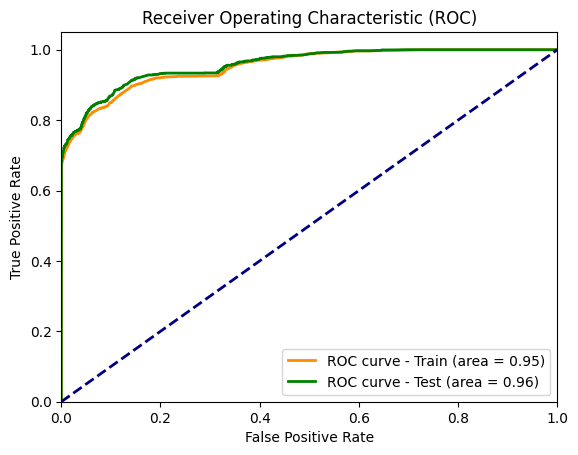

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores for the training data
y_scores_train = voting_clf.predict_proba(preprocessed_train_data)[:, 1]
# Compute ROC curve and ROC area for the training data
fpr_train, tpr_train, _ = roc_curve(diab_train_labels, y_scores_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate the probability scores for the test data
y_scores_test = voting_clf.predict_proba(preprocessed_test_data)[:, 1]
# Compute ROC curve and ROC area for the test data
fpr_test, tpr_test, _ = roc_curve(diab_test_labels, y_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for both training and test data
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve - Train (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve - Test (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Assuming you have your custom data point stored in a dictionary
custom_data_point = {
    'gender': 'Female',  # Keeping gender as Female
    'age': 43,  # Changing age to 43
    'hypertension': 0,
    'heart_disease': 0,
    'smoking_history': 'never',  # Keeping smoking_history as 'never'
    'bmi': 26.71,  # Changing BMI to 26.71
    'HbA1c_level': 6.5,  # Changing HbA1c_level to 6.5
    'blood_glucose_level': 300  # Changing blood_glucose_level to 300
}

# Convert your custom data point into a DataFrame
import pandas as pd

custom_df = pd.DataFrame([custom_data_point])

# Preprocess the custom input data
preprocessed_custom_data = preprocessor.transform(custom_df)

# Predict using the voting classifier
y_pred_custom_voting = voting_clf.predict(preprocessed_custom_data)

# Print the prediction
print('Prediction for custom input:', y_pred_custom_voting)


Prediction for custom input: [1]
